1. Бернулли – Bi(1,p), p = 0.7; Биномиальное – Bi(m,p), m = 5, p = 0.25;

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000
ALPHA0 = BETA = 131075
K = 128
M = 2**31
EPS = 0.05
P = 0.7
LAMBDA = 0.5
m = 5
p = 0.25

def MCM(alpha_t, beta, M):
    while True:
        alpha_t = (alpha_t * beta) % M
        yield alpha_t / M
mcm_gen = MCM(ALPHA0, BETA, M)

<BarContainer object of 2 artists>

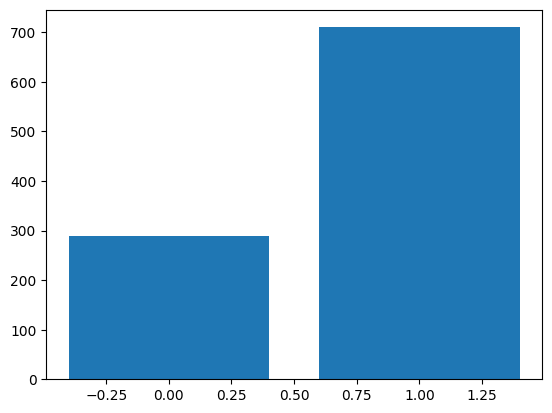

In [2]:
from collections import Counter

def bernoulli(gen, p):
    while True:
        if next(gen) >= p:
            yield 0
        else:
            yield 1

bernoulli_gen = bernoulli(mcm_gen, P)
bernoulli_values = [next(bernoulli_gen) for _ in range(N)]
bernoulli_cnt = Counter(bernoulli_values)

plt.bar(list(bernoulli_cnt.keys()), list(bernoulli_cnt.values()))

In [3]:
import numpy as np

sample_mean = np.mean(bernoulli_values)
sample_var = np.var(bernoulli_values)

print('Sample mean:', sample_mean)
print('Sample variance:', sample_var)

exp_mean = P
exp_var = P * (1 - P)
print('Expected mean:', exp_mean)
print('Expected variance:', exp_var)

Sample mean: 0.71
Sample variance: 0.20589999999999997
Expected mean: 0.7
Expected variance: 0.21000000000000002


In [4]:
from scipy import stats

def chisquare_criterion(gen, max_n, exp_probs):
    bin_counts = [0] * max_n

    for _ in range(N):
        bin_number = next(gen)
        bin_counts[bin_number] += 1

    exp_counts = np.array(exp_probs) * N

    return stats.chisquare(bin_counts, exp_counts)

print(f'Chisquare criterion for bernoulli: {chisquare_criterion(bernoulli_gen, 2, [1 - P, P])}')

Chisquare criterion for bernoulli: Power_divergenceResult(statistic=1.0714285714285656, pvalue=0.3006229881969051)


In [9]:
from tqdm import trange

iterations_cnt = 1000
errors_cnt = 0
for i in trange(iterations_cnt):
    errors_cnt += chisquare_criterion(bernoulli_gen, 2, [1 - P, P]).pvalue <= 0.05
print(errors_cnt / iterations_cnt)

100%|██████████| 1000/1000 [00:00<00:00, 1976.06it/s]

0.058


<BarContainer object of 6 artists>

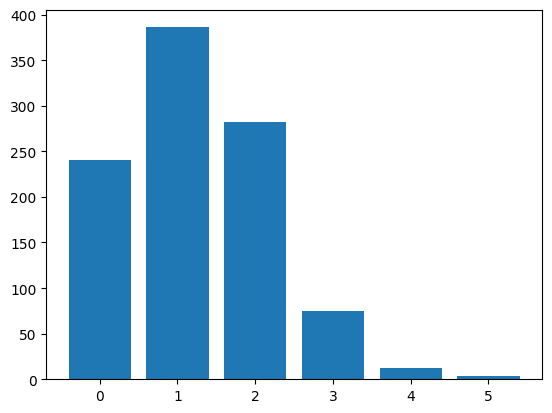

In [5]:
from collections import Counter

def binomial(gen, m0, p0):
    while True:
        cur_from_gen = next(gen)
        for i in range(m0 + 1):
            if stats.binom.cdf(i, m0, p0) > cur_from_gen:
                yield i
                break

binomial_gen = binomial(mcm_gen, m, p)
binomial_values = [next(binomial_gen) for _ in range(N)]
binomial_cnt = Counter(binomial_values)

plt.bar(list(binomial_cnt.keys()), list(binomial_cnt.values()))

In [6]:
sample_mean = np.mean(binomial_values)
sample_var = np.var(binomial_values)

print('Sample mean:', sample_mean)
print('Sample variance:', sample_var)

exp_mean = m*p
exp_var = m*p*(1-p)
print('Expected mean:', exp_mean)
print('Expected variance:', exp_var)

Sample mean: 1.243
Sample variance: 0.935951
Expected mean: 1.25
Expected variance: 0.9375


In [10]:
iterations_cnt = 1000
errors_cnt = 0
expected_probs = [stats.binom.pmf(i, m, p) for i in range(m + 1)]
for i in trange(iterations_cnt):
    errors_cnt += chisquare_criterion(binomial_gen, m + 1, expected_probs).pvalue <= 0.05
print(errors_cnt / iterations_cnt)

100%|██████████| 1000/1000 [03:10<00:00,  5.24it/s]

0.056


In [11]:
print(f'Chisquare criterion for binomial: {chisquare_criterion(binomial_gen, m + 1, expected_probs)}')

Chisquare criterion for binomial: Power_divergenceResult(statistic=7.606307818930092, pvalue=0.17930915403106593)
